In [5]:
# Dataframe fake pour visualisations
!pip install Faker

import pandas as pd
import random
from datetime import datetime, timedelta
from faker import Faker

   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   ---------- ----------------------------- 0.5/1.9 MB 3.3 MB/s eta 0:00:01
   -------------------------- ------------- 1.3/1.9 MB 3.5 MB/s eta 0:00:01
   ---------------------------------------- 1.9/1.9 MB 3.2 MB/s eta 0:00:00


In [7]:
fake = Faker('fr_FR')

def generate_fake_data(num_rows=50):
    """
    Generates a list of dictionaries, each representing a row of data
    for the ANSSI bulletin DataFrame.
    """
    data = []
    bulletin_types = ['Avis', 'Alerte', 'Information']
    base_severities = ['Low', 'Medium', 'High', 'Critical']
    cwe_types = [
        'CWE-287 (Improper Authentication)',
        'CWE-79 (Cross-site Scripting)',
        'CWE-89 (SQL Injection)',
        'CWE-20 (Improper Input Validation)',
        'CWE-125 (Out-of-bounds Read)'
    ]
    vendors = ['Ivanti', 'Microsoft', 'Google', 'Mozilla', 'Apache', 'VMware', 'Cisco']
    products = ['ICS', 'Windows Server', 'Chrome', 'Firefox', 'HTTP Server', 'ESXi', 'IOS XE']

    for i in range(num_rows):
        publish_date = fake.date_between(start_date='-1y', end_date='today')
        bulletin_id = f"CERTFR-{publish_date.year}-{fake.bothify(text='???-###')}"
        cve_id = f"CVE-{publish_date.year}-{random.randint(1000, 99999)}"
        title_keywords = [
            'Vulnérabilités multiples', 'Mise à jour de sécurité', 'Failles critiques',
            'Correction de bug', 'Avis de sécurité important', 'Élévation de privilèges'
        ]
        bulletin_title = f"{random.choice(title_keywords)} dans {random.choice(vendors)} {random.choice(products)}"

        num_affected_versions = random.randint(1, 3)
        affected_versions = ', '.join([
            f"{random.randint(0, 5)}.{random.randint(0, 10)}R{random.randint(1, 5)}"
            for _ in range(num_affected_versions)
        ])

        data.append({
            'ID du bulletin (ANSSI)': bulletin_id,
            'Titre du bulletin (ANSSI)': bulletin_title,
            'Type de bulletin': random.choice(bulletin_types),
            'Date de publication': publish_date.strftime('%Y-%m-%d'),
            'Identifiant CVE': cve_id,
            'Score CVSS': round(random.uniform(0.0, 10.0), 1),
            'Base Severity': random.choice(base_severities),
            'Type CWE': random.choice(cwe_types),
            'Score EPSS': round(random.uniform(0.0, 1.0), 2),
            'Lien du bulletin (ANSSI)': fake.url(),
            'Description': fake.paragraph(nb_sentences=2),
            'Éditeur/Vendor': random.choice(vendors),
            'Produit': random.choice(products),
            'Versions affectées': affected_versions
        })
    return data

# Generate the data
fake_data = generate_fake_data(num_rows=50)
df = pd.DataFrame(fake_data)

print("Generated DataFrame (first 5 rows):")
print(df.head())

print("\nDataFrame Info:")
df.info()

print("\nDataFrame Description:")
print(df.describe())

Generated DataFrame (first 5 rows):
  ID du bulletin (ANSSI)                  Titre du bulletin (ANSSI)  \
0    CERTFR-2024-YkZ-922          Correction de bug dans Apache ICS   
1    CERTFR-2024-SfU-258    Failles critiques dans Microsoft IOS XE   
2    CERTFR-2024-swQ-980    Failles critiques dans Microsoft IOS XE   
3    CERTFR-2025-Onm-726  Vulnérabilités multiples dans Ivanti ESXi   
4    CERTFR-2024-yaJ-652   Élévation de privilèges dans VMware ESXi   

  Type de bulletin Date de publication Identifiant CVE  Score CVSS  \
0      Information          2024-11-23  CVE-2024-47843         9.5   
1      Information          2024-11-19  CVE-2024-63575         2.6   
2      Information          2024-09-14   CVE-2024-2340         1.3   
3      Information          2025-02-19  CVE-2025-40400         6.0   
4           Alerte          2024-12-07  CVE-2024-24125         4.5   

  Base Severity                            Type CWE  Score EPSS  \
0      Critical       CWE-79 (Cross-site Scriptin

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [300]:
sns.set_theme(style="whitegrid", palette="viridis")

## Histogramme des scores CVSS 
### Observer la distribution des vulnérabilités selon leur niveau de gravité (critique, élevée, moyenne).

(array([ 0.,  2.,  4.,  6.,  8., 10.]),
 [Text(0, 0.0, '0'),
  Text(0, 2.0, '2'),
  Text(0, 4.0, '4'),
  Text(0, 6.0, '6'),
  Text(0, 8.0, '8'),
  Text(0, 10.0, '10')])

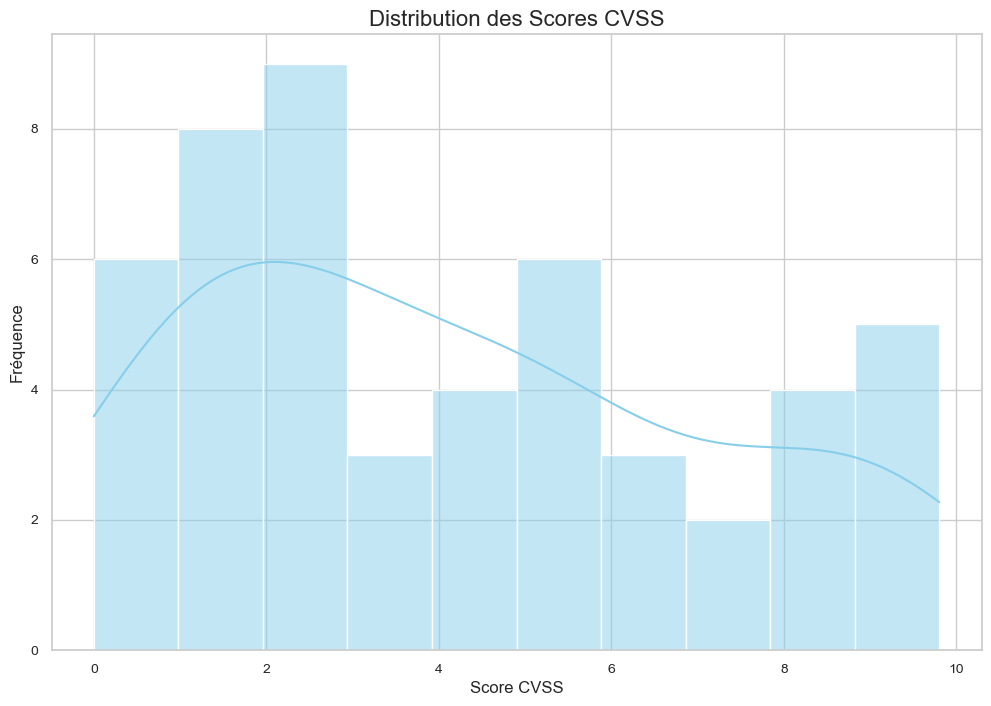

In [298]:
plt.figure(figsize=(12, 8))
sns.histplot(df['Score CVSS'], bins=10, kde=True, color='skyblue')
plt.title('Distribution des Scores CVSS', fontsize=16)
plt.xlabel('Score CVSS', fontsize=12)
plt.ylabel('Fréquence', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18.]),
 [Text(0, 0.0, '0'),
  Text(0, 2.0, '2'),
  Text(0, 4.0, '4'),
  Text(0, 6.0, '6'),
  Text(0, 8.0, '8'),
  Text(0, 10.0, '10'),
  Text(0, 12.0, '12'),
  Text(0, 14.0, '14'),
  Text(0, 16.0, '16'),
  Text(0, 18.0, '18')])

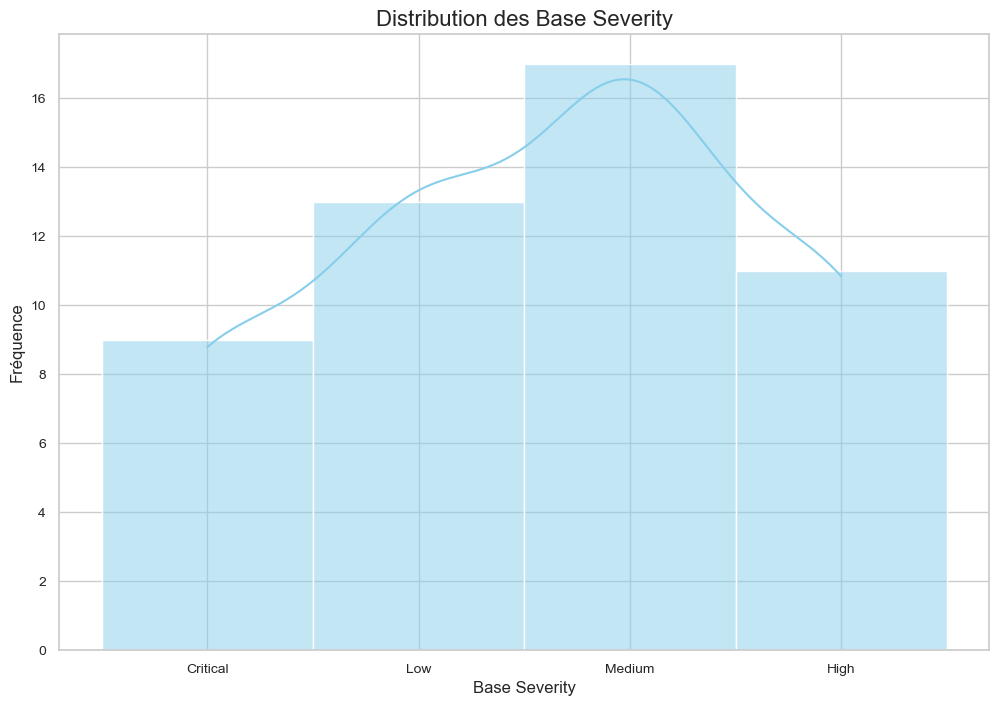

In [296]:
plt.figure(figsize=(12, 8))
sns.histplot(df['Base Severity'], bins=10, kde=True, color='skyBlue')
plt.title('Distribution des Base Severity', fontsize=16)
plt.xlabel('Base Severity', fontsize=12)
plt.ylabel('Fréquence', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

## Diagramme circulaire des types de vulnérabilités (CWE)
### Identifier les catégories de faiblesses les plus fréquentes (par exemple : Injection SQL, Débordement de mémoire, Authentification contournée).

(-1.0999997891437399,
 1.0999955904937244,
 -1.0999922745301487,
 1.099995503605855)

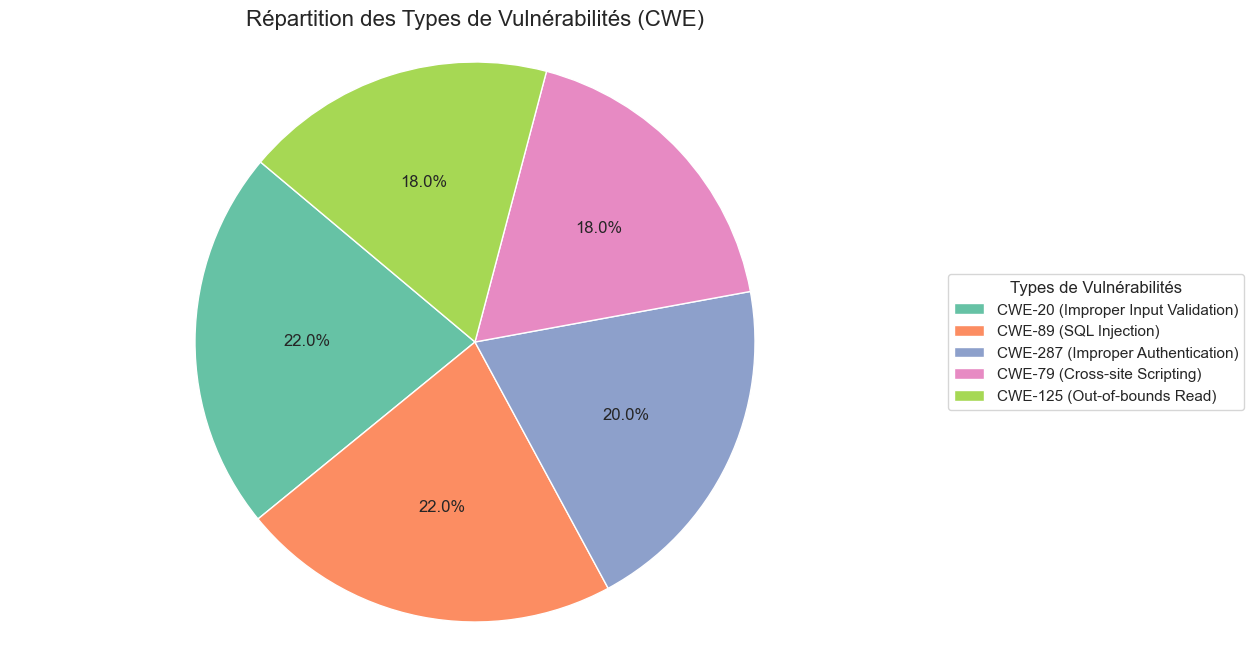

In [294]:
plt.figure(figsize=(12, 8))
cwe_counts = df['Type CWE'].value_counts()

top_n_cwe = 5
if len(cwe_counts) > top_n_cwe:
    other_cwe_count = cwe_counts.iloc[top_n_cwe:].sum()
    cwe_counts = cwe_counts.iloc[:top_n_cwe]
    cwe_counts['Autres'] = other_cwe_count

wedges, texts, autotexts = plt.pie(
    cwe_counts,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("Set2")
)

plt.legend(wedges, cwe_counts.index, title="Types de Vulnérabilités", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Répartition des Types de Vulnérabilités (CWE)', fontsize=16)
plt.axis('equal') 

# Courbe des scores EPSS
### Comprendre la probabilité d'exploitation des vulnérabilités recensées et les prioriser en fonction de leur risque réel

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0, '1.0'),
  Text(0, 1.2000000000000002, '1.2')])

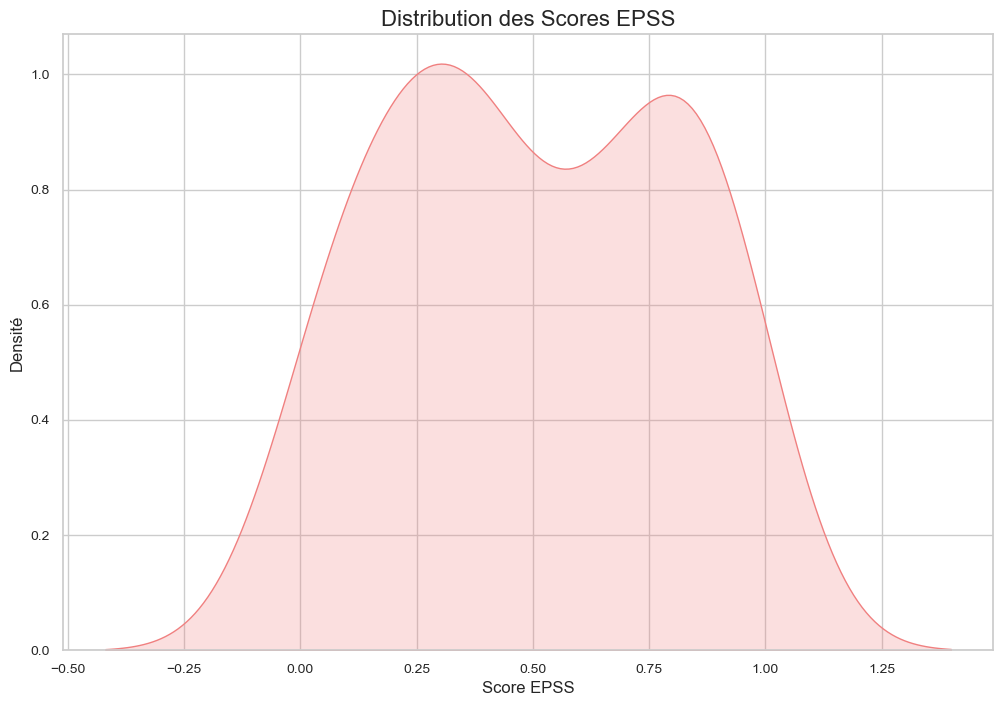

In [292]:
plt.figure(figsize=(12, 8))
sns.kdeplot(df['Score EPSS'], fill=True, color='lightcoral')
plt.title('Distribution des Scores EPSS', fontsize=16)
plt.xlabel('Score EPSS', fontsize=12)
plt.ylabel('Densité', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Classement des produits ou éditeurs les plus affectés
### Mettre en lumière les systèmes les plus vulnérables et cibler les actions à entreprendre.

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'ESXi'),
  Text(0, 1, 'HTTP Server'),
  Text(0, 2, 'Windows Server'),
  Text(0, 3, 'Firefox'),
  Text(0, 4, 'ICS'),
  Text(0, 5, 'Chrome'),
  Text(0, 6, 'IOS XE')])

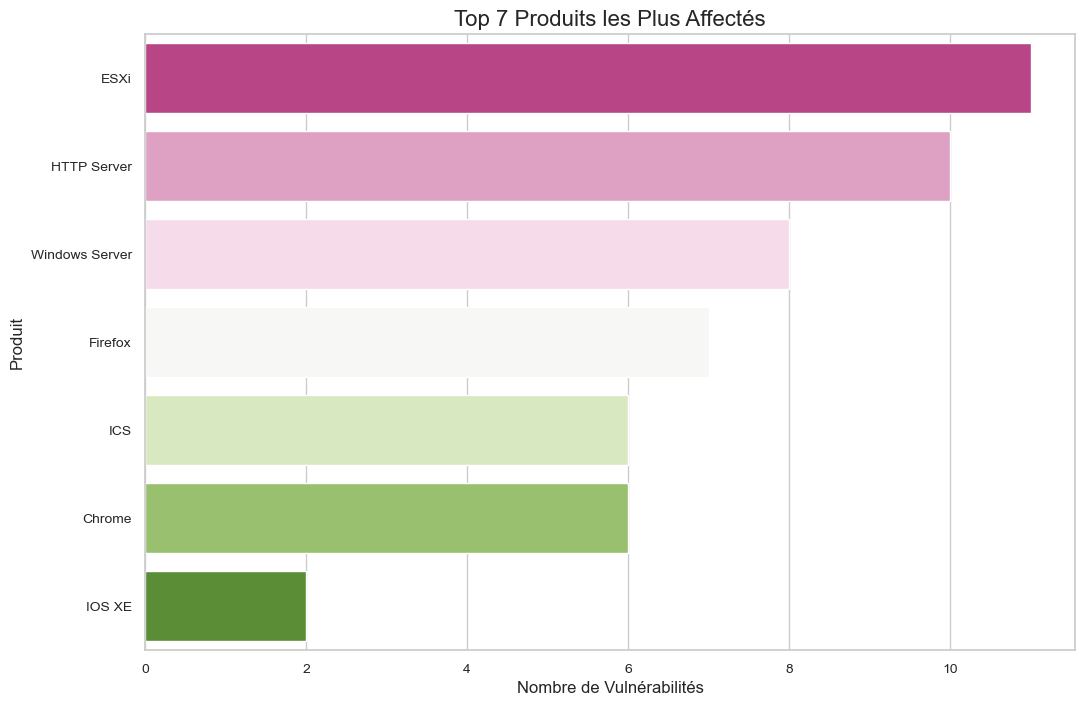

In [290]:
plt.figure(figsize=(12, 8))
top_affected_products = df['Produit'].value_counts().head(7)
sns.barplot(x=top_affected_products.values, y=top_affected_products.index, palette='PiYG', hue=top_affected_products.index, legend=False)
plt.title('Top 7 Produits les Plus Affectés', fontsize=16)
plt.xlabel('Nombre de Vulnérabilités', fontsize=12)
plt.ylabel('Produit', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Heatmap des corrélations entre CVSS et EPSS
## Analyser la relation entre le score CVSS (niveau de gravité) et le score EPSS (probabilité d'exploitation)

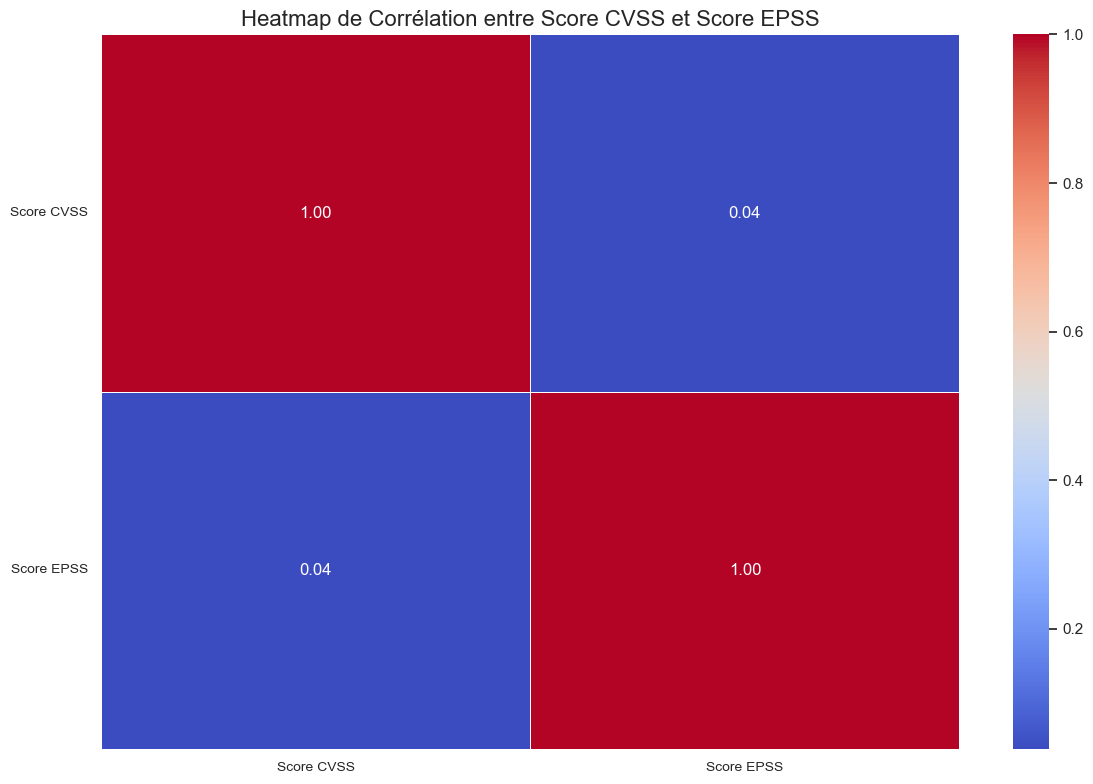

In [288]:
plt.figure(figsize=(12, 8))
correlation_matrix = df[['Score CVSS', 'Score EPSS']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap de Corrélation entre Score CVSS et Score EPSS', fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10, rotation=0)

plt.tight_layout()
plt.show()

# Nuage de points entre Score CVSS et Score EPSS
### Visualiser comment la probabilité d'exploitation (EPSS) évolue par rapport au niveau de gravité (CVSS).

In [ ]:
sns.set_theme(style="whitegrid", palette="viridis")
plt.figure(figsize=(20, 25))

# Nuage de points entre Score CVSS et Score EPSS
### Visualiser comment la probabilité d'exploitation (EPSS) évolue par rapport au niveau de gravité (CVSS)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, -0.2, '−0.2'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4000000000000001, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0000000000000002, '1.0'),
  Text(0, 1.2000000000000002, '1.2')])

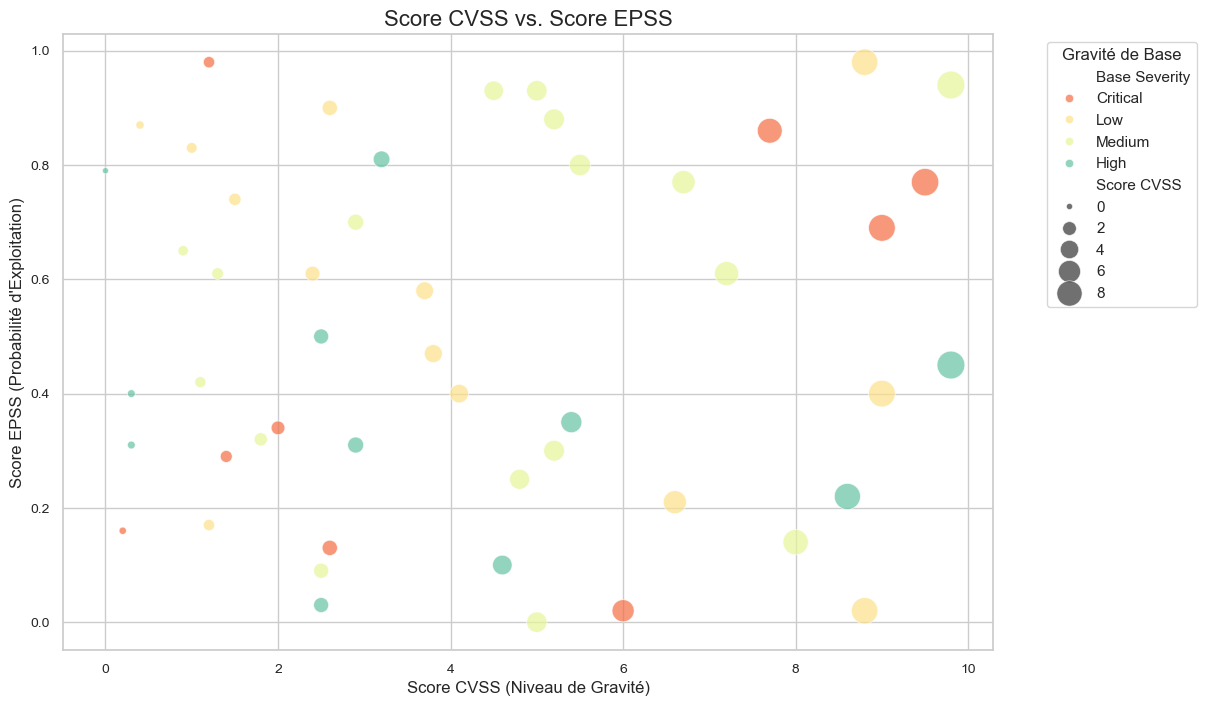

In [286]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Score CVSS', y='Score EPSS', hue='Base Severity',
                size='Score CVSS', sizes=(20, 400), alpha=0.7, palette='Spectral')
plt.title('Score CVSS vs. Score EPSS', fontsize=16)
plt.xlabel('Score CVSS (Niveau de Gravité)', fontsize=12)
plt.ylabel('Score EPSS (Probabilité d\'Exploitation)', fontsize=12)
plt.legend(title='Gravité de Base', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Courbe cumulative des vulnérabilités en fonction du temps
### Montrer l’évolution temporelle du nombre de vulnérabilités détectées

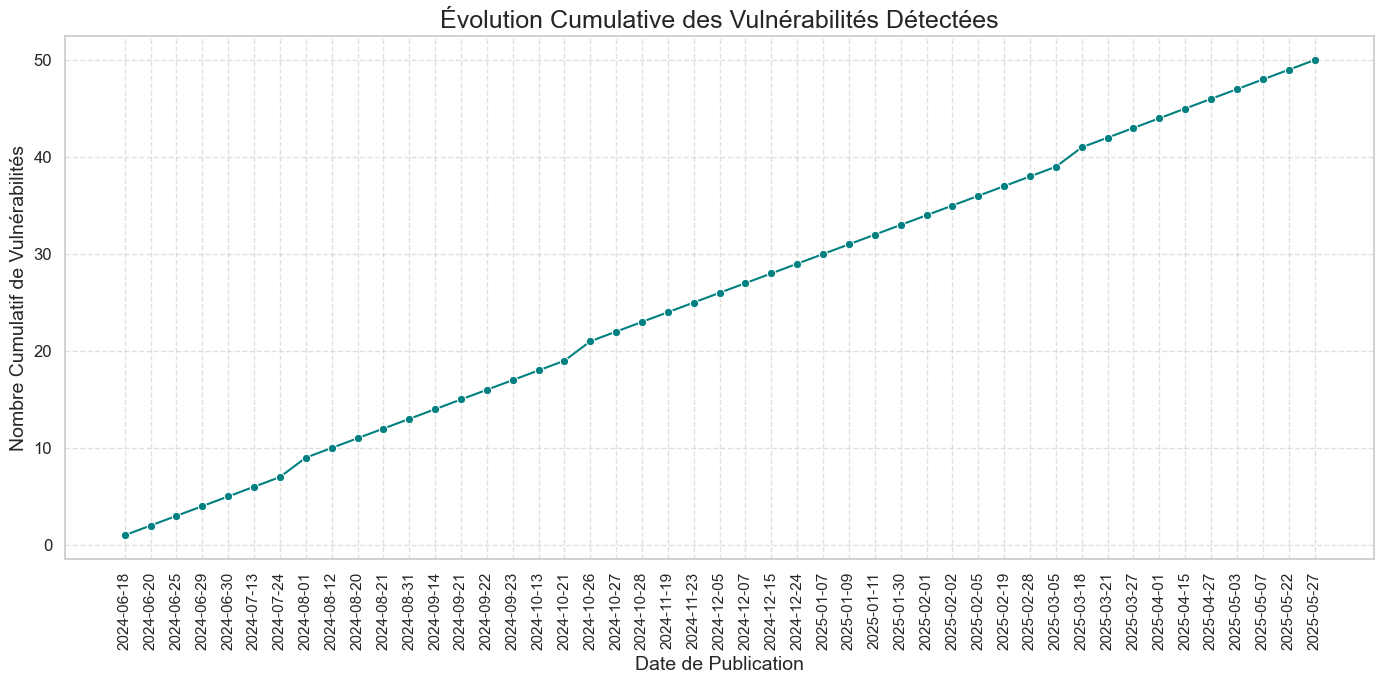

In [280]:
import matplotlib.dates as mdates

# Sort by date
df_sorted_by_date = df.sort_values('Date de publication')
df_sorted_by_date['Cumulative Vulnérabilités'] = range(1, len(df_sorted_by_date) + 1)

cumulative_df = df_sorted_by_date.groupby('Date de publication').size().reset_index(name='Daily Vulnerabilities')
cumulative_df['Cumulative Vulnérabilités'] = cumulative_df['Daily Vulnerabilities'].cumsum()

plt.figure(figsize=(14, 7))

sns.lineplot(data=cumulative_df, x='Date de publication', y='Cumulative Vulnérabilités',
             marker='o', linestyle='-', color='teal') # Changed linestyle for visual distinction

plt.title('Évolution Cumulative des Vulnérabilités Détectées', fontsize=18)
plt.xlabel('Date de Publication', fontsize=14)
plt.ylabel('Nombre Cumulatif de Vulnérabilités', fontsize=14)

# Y-axis ticks
plt.yticks(fontsize=12) 
plt.xticks(rotation=90) 

plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# Boxplot des scores CVSS par éditeurs
### Montrer la dispersion des scores CVSS pour les éditeurs les plus affectés

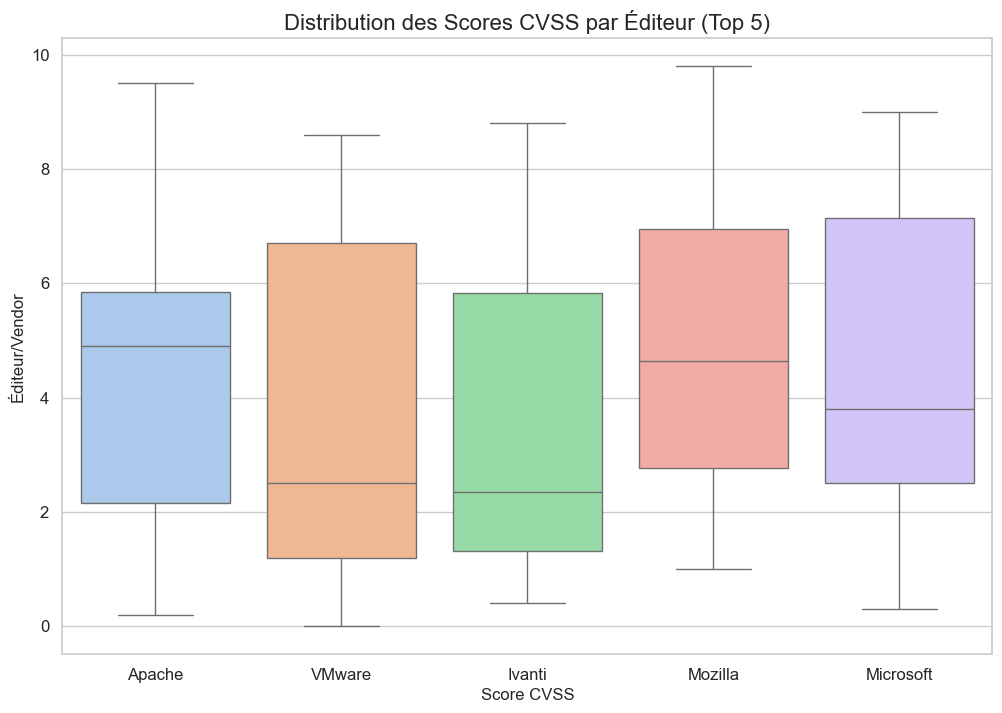

In [304]:
top_n_vendors = df['Éditeur/Vendor'].value_counts().head(5).index
df_top_vendors = df[df['Éditeur/Vendor'].isin(top_n_vendors)]

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_top_vendors, x='Éditeur/Vendor', y='Score CVSS', hue='Éditeur/Vendor', palette='pastel', legend=False)
plt.title('Distribution des Scores CVSS par Éditeur (Top 5)', fontsize=16)
plt.xlabel('Score CVSS', fontsize=12)
plt.ylabel('Éditeur/Vendor', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Visualisations particulières pour un type défini CWE
### Focus on 'Injection SQL' - create a bar plot of affected products for this CWE

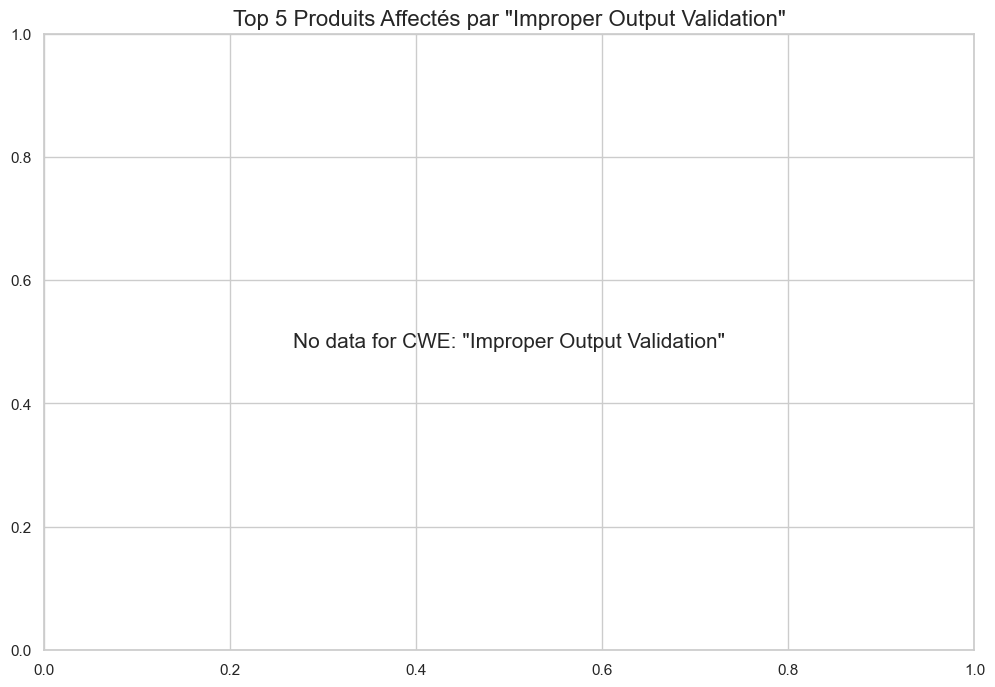

In [389]:
# Problème : manque de données dans fake dataframe
plt.figure(figsize=(12, 8))
specific_cwe = 'Improper Output Validation'
df_specific_cwe = df[df['Type CWE'] == specific_cwe]

if not df_specific_cwe.empty:
    affected_products_cwe = df_specific_cwe['Produit'].value_counts().head(5)
    sns.barplot(x=affected_products_cwe.values, y=affected_products_cwe.index, palette='mako')
    plt.title(f'Top 5 Produits Affectés par "{specific_cwe}"', fontsize=16)
    plt.xlabel('Nombre de Vulnérabilités', fontsize=12)
    plt.ylabel('Produit', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
else:
    plt.text(0.5, 0.5, f'No data for CWE: "{specific_cwe}"', horizontalalignment='center',
             verticalalignment='center', transform=plt.gca().transAxes, fontsize=15)
    plt.title(f'Top 5 Produits Affectés par "{specific_cwe}"', fontsize=16)

# Montrer l'évolution temporelle du nombre de vulnérabilités détectées (Monthly Count)
### Group by month and count vulnerabilities

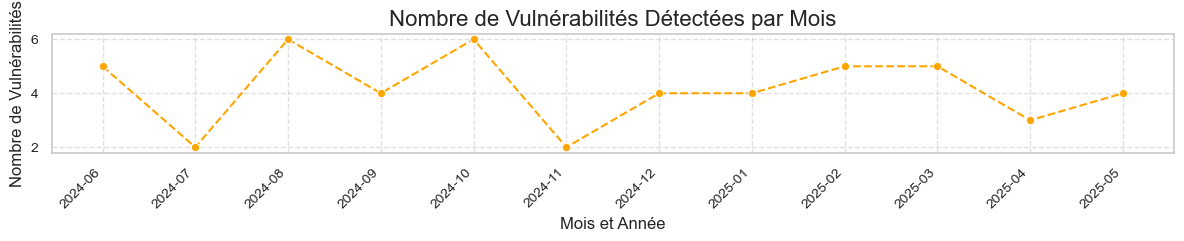

In [352]:
df['Date de publication'] = pd.to_datetime(df['Date de publication'], errors='coerce')
df.dropna(subset=['Date de publication'], inplace=True)
df['Mois_Année'] = df['Date de publication'].dt.to_period('M')

monthly_counts = df['Mois_Année'].value_counts().sort_index()
monthly_counts_df = monthly_counts.rename_axis('Mois_Année').reset_index(name='Nombre de Vulnérabilités')
monthly_counts_df['Mois_Année'] = monthly_counts_df['Mois_Année'].astype(str)

plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 3)
sns.lineplot(data=monthly_counts_df, x='Mois_Année', y='Nombre de Vulnérabilités',
             marker='o', linestyle='--', color='orange')
plt.title('Nombre de Vulnérabilités Détectées par Mois', fontsize=16)
plt.xlabel('Mois et Année', fontsize=12)
plt.ylabel('Nombre de Vulnérabilités', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# Analyser le nombre de vulnérabilités par éditeur et distinguer les types de bulletins (avis ou alertes) 

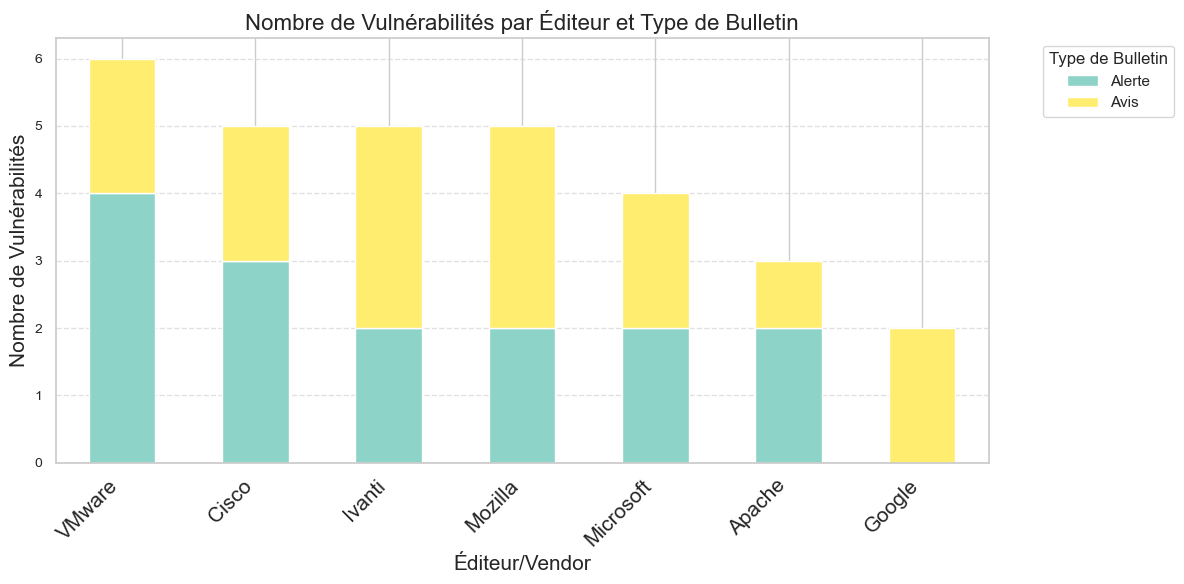

In [324]:
df_filtered_bulletins = df[df['Type de bulletin'].isin(['Avis', 'Alerte'])]
# Count vulnerabilities by vendor and bulletin type
vendor_bulletin_counts = df_filtered_bulletins.groupby(['Éditeur/Vendor', 'Type de bulletin']).size().unstack(fill_value=0)

# Sort by total vulnerabilities for better visualization if needed, or by one type
vendor_bulletin_counts['Total'] = vendor_bulletin_counts.sum(axis=1)
vendor_bulletin_counts = vendor_bulletin_counts.sort_values('Total', ascending=False).head(7) # Top 7 vendors by total
vendor_bulletin_counts = vendor_bulletin_counts.drop(columns='Total')

plt.figure(figsize=(12, 8))
vendor_bulletin_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set3', ax=plt.gca())
plt.title('Nombre de Vulnérabilités par Éditeur et Type de Bulletin', fontsize=16)
plt.xlabel('Éditeur/Vendor', fontsize=15)
plt.ylabel('Nombre de Vulnérabilités', fontsize=15)
plt.xticks(rotation=45, ha='right', fontsize=15)
plt.yticks(fontsize=10)
plt.legend(title='Type de Bulletin', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# Visualiser les versions les plus fréquemment touchées des produits concernés

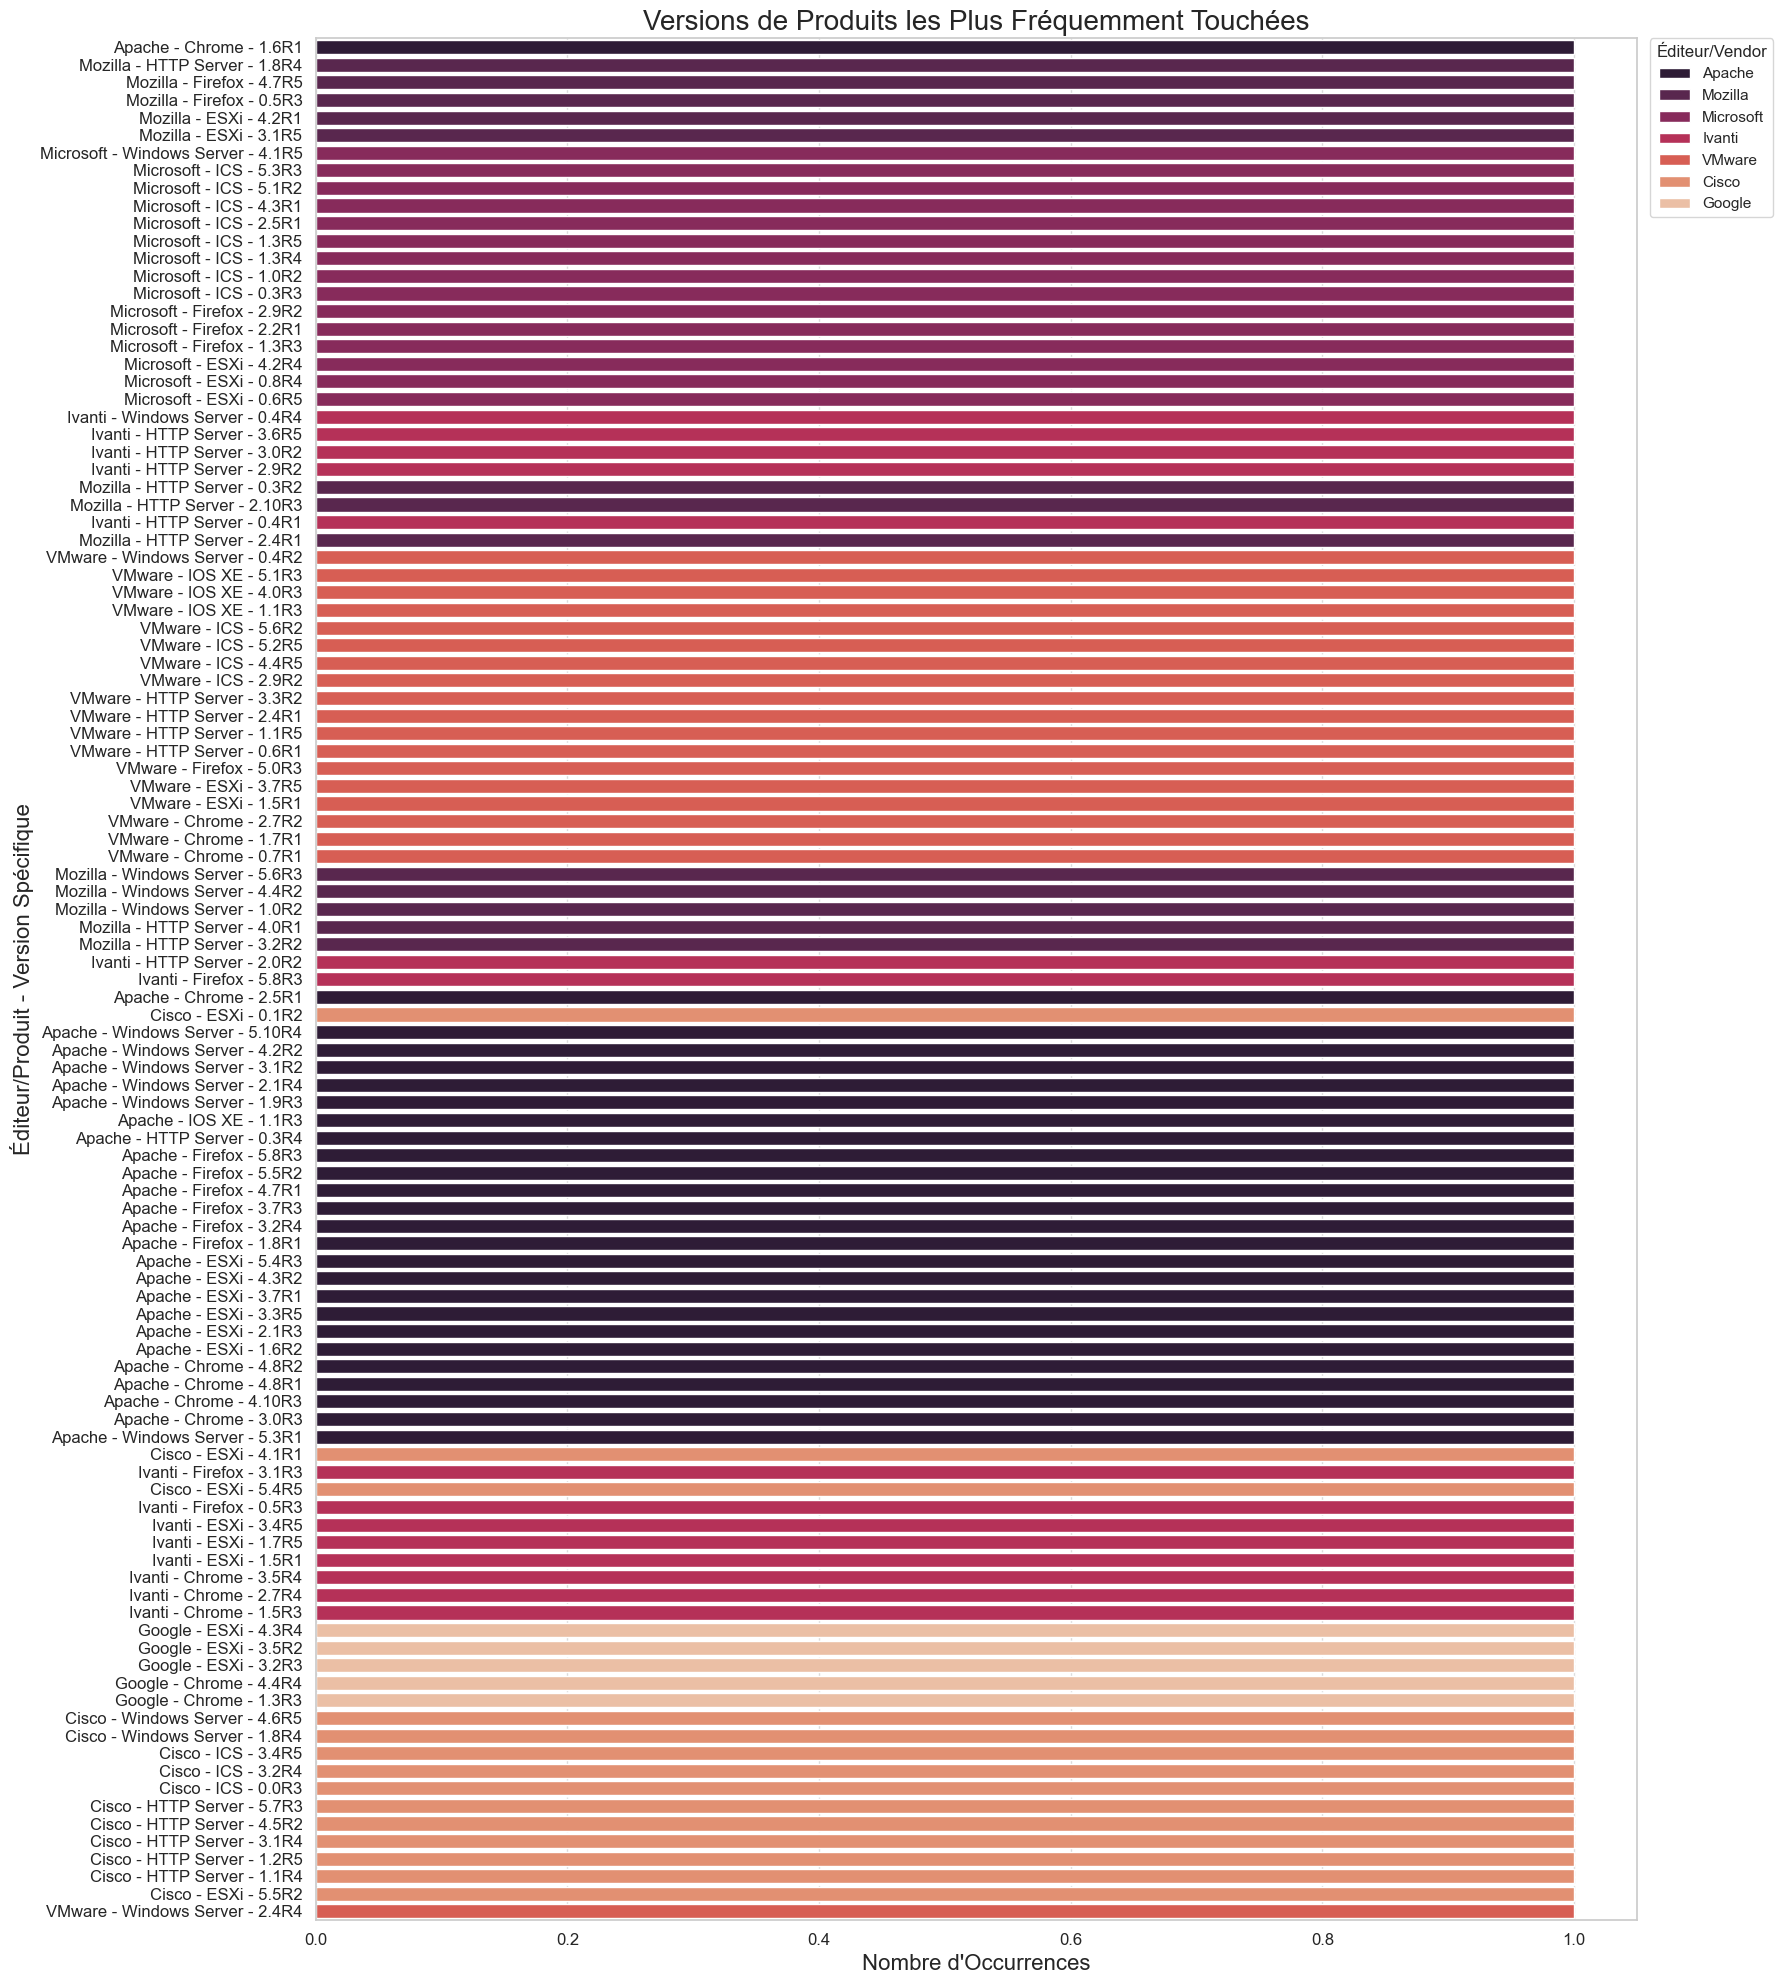

In [376]:
df['Versions affectées_list'] = df['Versions affectées'].apply( lambda x: [v.strip() for v in x.split(',')] if isinstance(x, str) else [])
df_exploded = df.explode('Versions affectées_list')

df_exploded['Produit_Version_Spécifique'] = \
    df_exploded['Éditeur/Vendor'] + ' - ' + \
    df_exploded['Produit'] + ' - ' + \
    df_exploded['Versions affectées_list']

version_counts = df_exploded.groupby(['Produit_Version_Spécifique', 'Éditeur/Vendor']).size().reset_index(name='Nombre d\'Occurrences')
version_counts_df = version_counts.sort_values(by='Nombre d\'Occurrences', ascending=False)
plt.figure(figsize=(18, 20))

sns.barplot(
    x='Nombre d\'Occurrences',
    y='Produit_Version_Spécifique',
    data=version_counts_df,
    hue='Éditeur/Vendor',
    palette='rocket',
    dodge=False # Set dodge to False to prevent splitting bars for each hue category if y-labels are unique.
)

plt.title('Versions de Produits les Plus Fréquemment Touchées', fontsize=20)
plt.xlabel('Nombre d\'Occurrences', fontsize=16)
plt.ylabel('Éditeur/Produit - Version Spécifique', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend(title='Éditeur/Vendor', bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()

plt.show()

# Montrer la dispersion des scores CVSS pour les éditeurs les plus affectés

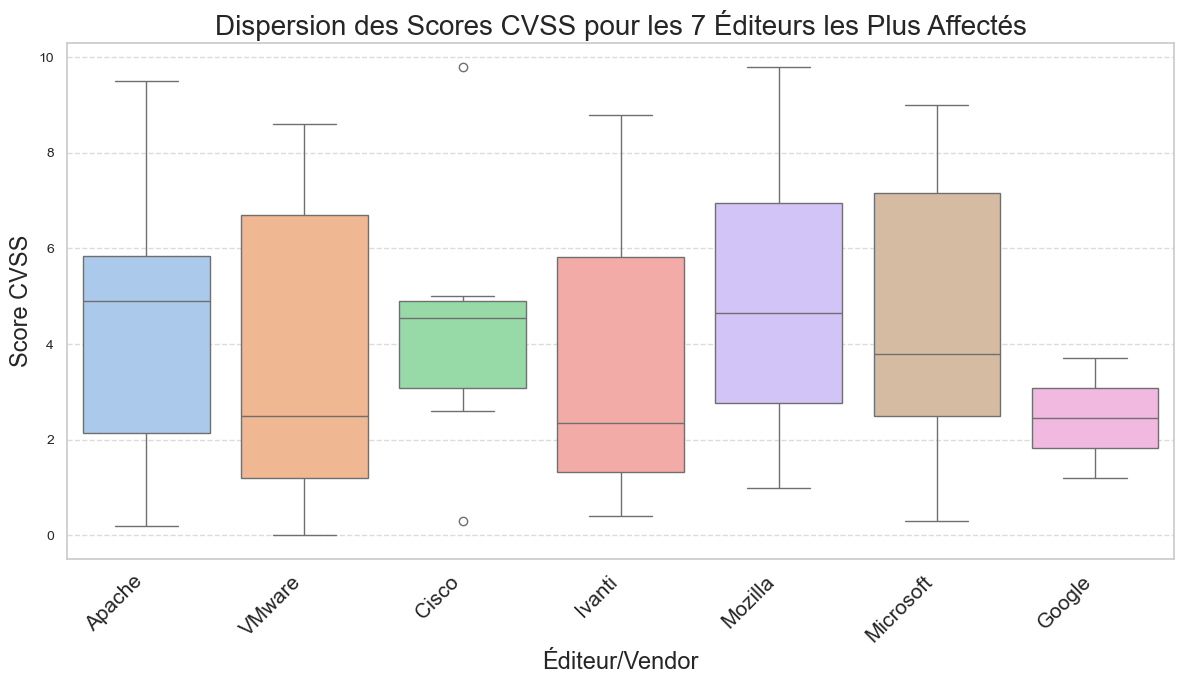

In [386]:
n_top_vendors = 7
top_vendors = df['Éditeur/Vendor'].value_counts().head(n_top_vendors).index
df_top_vendors = df[df['Éditeur/Vendor'].isin(top_vendors)]
plt.figure(figsize=(12, 7)) 

sns.boxplot(
    data=df_top_vendors,
    x='Éditeur/Vendor',
    y='Score CVSS',
    hue='Éditeur/Vendor',
    palette='pastel',
    legend=False
)

plt.title(f'Dispersion des Scores CVSS pour les {n_top_vendors} Éditeurs les Plus Affectés', fontsize=20)
plt.xlabel('Éditeur/Vendor', fontsize=17)
plt.ylabel('Score CVSS', fontsize=17)
plt.xticks(rotation=45, ha='right', fontsize=15)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()